1) Implement Gaussian Naïve Bayes Classifier on the Iris dataset from sklearn.datasets using

* Step-by-step implementation 

* In-built function

In [1]:
import numpy as np
import pandas as pd

In [43]:
from sklearn.datasets import load_iris
obj = load_iris()

In [44]:
X = obj.data
Y = obj.target

In [32]:
df = pd.DataFrame(X,columns=obj.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: >

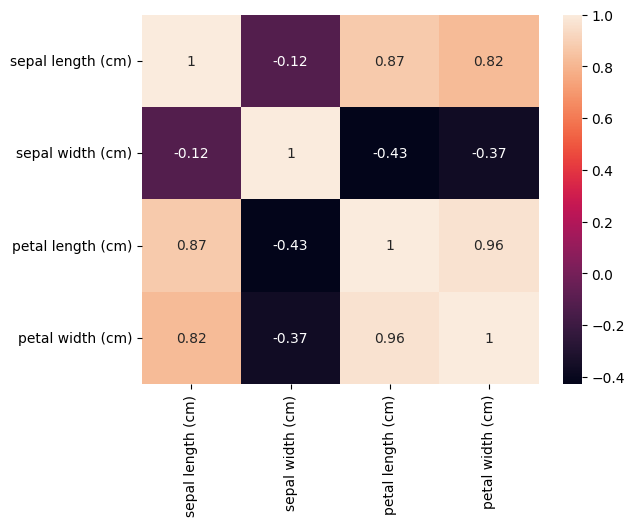

In [34]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

i) Using RawPython

In [ ]:
class Gaussian_Naive_Bayes:
     def fit(self, X_train, Y_train):
          n, k = X_train.shape
          classes = np.unique(Y_train)
          num_classes = len(classes)
          
          self.mean = np.zeros((num_classes, k)) #stores the mean of each feature in that class
          self.variance = np.zeros((num_classes, k)) #stores the var of each feature of that class
          self.priors = np.zeros(num_classes) #stores prior_prob = class/total sample
          i = 0
          for c in classes:
               subSet = X_train[Y_train == c] #isolating a class
               self.mean[i,:] = subSet.mean(axis=0)
               self.variance[i,:] = subSet.var(axis=0)
               self.priors[i] = len(subSet)/len(X_train)
               i=i+1
     
          self.classes = classes
          return self

     def predict(self, X_test):
          n_samples = X_test.shape[0]
          predictions = np.zeros(n_samples)
          for i in range(n_samples):
               posteriors = []
               j = 0
               for c in self.classes:
                    prior = np.log(self.priors[j])
                    #applying the Gaussian Naive Bayes Formula
                    Nr = np.exp(-(X_test[i]-self.mean[j])**2/(self.variance[j]))
                    Dr = np.sqrt(2*np.pi*self.variance[j]) + 1e-7
                    GaussProb = np.sum(np.log(Nr/Dr)) # taking log to avoid underflow
                    post = prior+GaussProb
                    posteriors.append(post)
                    j=j+1

               # Selecting the class with the highest Posterior Probability
               predictions[i] = self.classes[np.argmax(posteriors)]
               

          return predictions.astype(int)

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [107]:
gnb_new = Gaussian_Naive_Bayes()
gnb_new.fit(X_train,Y_train)
y_pred_new = gnb_new.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_new)
print('Accuracy of Custom Implementation = ',accuracy)

Accuracy of Custom Implementation =  1.0


C:\Users\yoanu\AppData\Local\Temp\ipykernel_23368\1452152153.py:32: RuntimeWarning: divide by zero encountered in log
  GaussProb = np.sum(np.log(Nr/Dr)) #can take log here to avoid underflow


ii) Using SkLearn

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

,priors,None
,var_smoothing,1e-09


In [47]:
y_pred = gnb.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,y_pred)
print('Accuracy of the Inbuilt Model = ',acc)

Accuracy of the Inbuilt Model =  1.0


2) Explore about GridSearchCV toot in scikit-learn. 
This is a tool that is often used for tuning hyperparameters of machine learning models. Use this tool to find the best value of K for K-NN Classifier using any dataset.

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Define parameter grid (values of K to try)
param_grid = {'n_neighbors': list(range(1, 31))}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # this basically does 5 fold cross validation and tests for K=1 to 30 and returns the model with best k
grid.fit(X_train, Y_train)

print("Best K:", grid.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set accuracy:", grid.score(X_test, Y_test))


Best K: 3
Best cross-validation accuracy: 0.9583333333333334
Test set accuracy: 1.0
